In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix
import xpress  as xp

In [3]:
# input
N = 7
custom_setup = True

In [4]:
# Customers’ demand and preferences
q = np.ones(N)
C = np.arange(7)
C_L = [0, 5] #TODO make it scalable
C_D = [1, 2, 3, 4, 6] #TODO make it scalable
S_k =[1, 2, 6] #TODO make it scalable
a_k = ["L1", "W"]


[0 1 2 3 4 5 6]


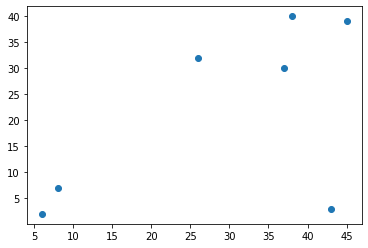

In [4]:
#random generation of x y coordinates which will represent the location of our customers, lockers and warehouse
x = np.random.randint(0, 50, N)
y = np.random.randint(0, 50, N)
C = [x,y]
plt.scatter(C[0],C[1])
C = np.arange(N)
print(C)
plt.show()

[[0.06916367 0.47501348]
 [0.76053093 0.86880886]
 [0.44846426 0.5466526 ]
 [0.86957456 0.65391512]
 [0.6858352  0.83608172]
 [0.72209407 0.3321501 ]
 [0.1258424  0.69306342]]


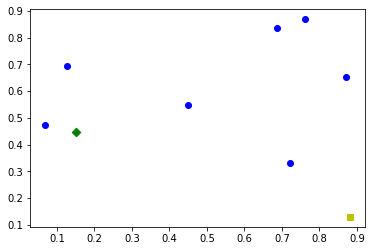

In [6]:
#plotting ou point with the appropriate shape as in the paper
C = np.random.rand(N,2)
plt.scatter(C[:,0],C[:,1],color='b')
W = np.random.rand(1,2)
plt.scatter(W[:,0],W[:,1],color='g',marker='D')
L = np.random.rand(1,2)
plt.scatter(L[:,0],L[:,1],color ='y',marker='s')
print(C)

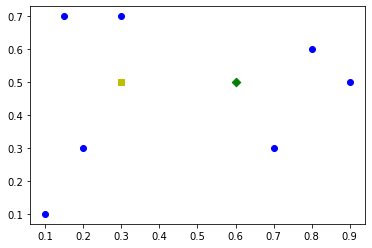

In [25]:
C = np.array([[0.1 ,0.1], [0.2 ,0.3],[0.15 ,0.7], [0.3 ,0.7],[0.8 ,0.6],
              [0.9 ,0.5],[0.7 ,0.3]])
plt.scatter(C[:,0],C[:,1],color='b')
W = np.array([[0.6 ,0.5]])
plt.scatter(W[:,0],W[:,1],color='g',marker='D')
L = np.array([[0.3 ,0.5]])
plt.scatter(L[:,0],L[:,1],color ='y',marker='s')

In [26]:
#calcolo la matrice delle distanze:
data = np.array([])
data = np.append(data,W)
data = np.vstack([data,L])
data = np.vstack([data,C])
houses =['Warehouse','Locker','c1','c2','c3','c4','c5','c6','c7']
print(len(data))
df = pd.DataFrame(data, columns=['xcord', 'ycord'], index=houses)
pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)


9


,Warehouse,Locker,c1,c2,c3,c4,c5,c6,c7
Warehouse,0.000000,0.300000,0.640312,0.447214,0.492443,0.360555,0.223607,0.300000,0.223607
Locker,0.300000,0.000000,0.447214,0.223607,0.250000,0.200000,0.509902,0.600000,0.447214
c1,0.640312,0.447214,0.000000,0.223607,0.602080,0.632456,0.860233,0.894427,0.632456
c2,0.447214,0.223607,0.223607,0.000000,0.403113,0.412311,0.670820,0.728011,0.500000
c3,0.492443,0.250000,0.602080,0.403113,0.000000,0.150000,0.657647,0.776209,0.680074
c4,0.360555,0.200000,0.632456,0.412311,0.150000,0.000000,0.509902,0.632456,0.565685
c5,0.223607,0.509902,0.860233,0.670820,0.657647,0.509902,0.000000,0.141421,0.316228
c6,0.300000,0.600000,0.894427,0.728011,0.776209,0.632456,0.141421,0.000000,0.282843
c7,0.223607,0.447214,0.632456,0.500000,0.680074,0.565685,0.316228,0.282843,0.000000
